In [37]:
from sklearn.pipeline import Pipeline
#from statistics import mean,stdev
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
#import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import math
from sklearn.model_selection import cross_val_score , RepeatedKFold, RandomizedSearchCV, GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns ## optional
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [3]:
# Home Block - need to change to "out_como.xlsx"
# Change to fix the syntetic id
dataset_como = pd.read_excel("output_como_changed_id.xlsx")
dataset_como

,id,past_legend,current_legend,bobstetrics,cardiac,gastro,hematologic,metabolic,neurologcial,oncologic,...,gastro.1,hematologic.1,metabolic.1,neurologcial.1,oncologic.1,pulmonary.1,renal .1,sepsis.1,trauma.1,vascular.1
0,01C61269,SURGICAL,SURGICAL,0,0,2,0,0,0,0,...,1,0,3,1,1,1,0,0,0,0
1,022CD839,SURGICAL,MEDICAL,0,3,0,0,0,1,2,...,0,0,3,0,1,1,0,0,0,0
2,024AF2B4,MEDICAL,SURGICAL,0,0,1,3,1,1,2,...,0,3,0,2,3,1,0,0,0,1
3,02A0F8B6,TRANSPLANTATION,SURGICAL,0,0,5,0,0,0,1,...,2,0,0,0,0,1,0,1,0,0
4,035F86D2,TRAUMA,SURGICAL,0,0,6,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,4C1074EE,SURGICAL,MEDICAL,0,0,0,1,1,1,0,...,1,2,0,0,0,1,0,0,1,0
106,4C6088D4,MEDICAL,NaN,0,1,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
107,4E5735E0,OBSTETRICS,NaN,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,508AF64F,SURGICAL,MEDICAL,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Code that finding nulls columns!
nan_cols_como = [i for i in dataset_como.columns if dataset_como[i].isnull().any()]
nan_cols_como

['current_legend']

In [5]:
# Home Block
# fill the frequent - Noam to check
dataset_como = dataset_como.fillna(dataset_como['current_legend'].mode().iloc[0])
dataset_como
##result = df.fillna(df.mode().iloc[0])

,id,past_legend,current_legend,bobstetrics,cardiac,gastro,hematologic,metabolic,neurologcial,oncologic,...,gastro.1,hematologic.1,metabolic.1,neurologcial.1,oncologic.1,pulmonary.1,renal .1,sepsis.1,trauma.1,vascular.1
0,01C61269,SURGICAL,SURGICAL,0,0,2,0,0,0,0,...,1,0,3,1,1,1,0,0,0,0
1,022CD839,SURGICAL,MEDICAL,0,3,0,0,0,1,2,...,0,0,3,0,1,1,0,0,0,0
2,024AF2B4,MEDICAL,SURGICAL,0,0,1,3,1,1,2,...,0,3,0,2,3,1,0,0,0,1
3,02A0F8B6,TRANSPLANTATION,SURGICAL,0,0,5,0,0,0,1,...,2,0,0,0,0,1,0,1,0,0
4,035F86D2,TRAUMA,SURGICAL,0,0,6,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,4C1074EE,SURGICAL,MEDICAL,0,0,0,1,1,1,0,...,1,2,0,0,0,1,0,0,1,0
106,4C6088D4,MEDICAL,MEDICAL,0,1,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
107,4E5735E0,OBSTETRICS,MEDICAL,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,508AF64F,SURGICAL,MEDICAL,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Home Block
## A check to see that is working
nan_cols_como = [i for i in dataset_como.columns if dataset_como[i].isnull().any()]
nan_cols_como

[]

In [7]:
dataset_como = dataset_como.rename(columns={'id':'h-num_demo'})
dataset_como

,h-num_demo,past_legend,current_legend,bobstetrics,cardiac,gastro,hematologic,metabolic,neurologcial,oncologic,...,gastro.1,hematologic.1,metabolic.1,neurologcial.1,oncologic.1,pulmonary.1,renal .1,sepsis.1,trauma.1,vascular.1
0,01C61269,SURGICAL,SURGICAL,0,0,2,0,0,0,0,...,1,0,3,1,1,1,0,0,0,0
1,022CD839,SURGICAL,MEDICAL,0,3,0,0,0,1,2,...,0,0,3,0,1,1,0,0,0,0
2,024AF2B4,MEDICAL,SURGICAL,0,0,1,3,1,1,2,...,0,3,0,2,3,1,0,0,0,1
3,02A0F8B6,TRANSPLANTATION,SURGICAL,0,0,5,0,0,0,1,...,2,0,0,0,0,1,0,1,0,0
4,035F86D2,TRAUMA,SURGICAL,0,0,6,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,4C1074EE,SURGICAL,MEDICAL,0,0,0,1,1,1,0,...,1,2,0,0,0,1,0,0,1,0
106,4C6088D4,MEDICAL,MEDICAL,0,1,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
107,4E5735E0,OBSTETRICS,MEDICAL,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,508AF64F,SURGICAL,MEDICAL,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#One Hot Encoder
#current_legend = pd.get_dummies(dataset_como.current_legend, prefix='current')
#print(current_legend.head())

In [9]:
#One Hot Encoder
#past_legend = pd.get_dummies(dataset_como.past_legend, prefix='past')
#print(past_legend.head())

In [10]:
dataset_como.drop({'past_legend','current_legend'},inplace=True,axis=1)
dataset_como

,h-num_demo,bobstetrics,cardiac,gastro,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,...,gastro.1,hematologic.1,metabolic.1,neurologcial.1,oncologic.1,pulmonary.1,renal .1,sepsis.1,trauma.1,vascular.1
0,01C61269,0,0,2,0,0,0,0,1,0,...,1,0,3,1,1,1,0,0,0,0
1,022CD839,0,3,0,0,0,1,2,4,0,...,0,0,3,0,1,1,0,0,0,0
2,024AF2B4,0,0,1,3,1,1,2,1,0,...,0,3,0,2,3,1,0,0,0,1
3,02A0F8B6,0,0,5,0,0,0,1,0,0,...,2,0,0,0,0,1,0,1,0,0
4,035F86D2,0,0,6,0,0,0,0,3,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,4C1074EE,0,0,0,1,1,1,0,0,1,...,1,2,0,0,0,1,0,0,1,0
106,4C6088D4,0,1,0,1,2,1,0,1,2,...,0,0,0,0,0,0,0,0,0,0
107,4E5735E0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,508AF64F,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dataset_como.columns

Index(['h-num_demo', 'bobstetrics', 'cardiac', 'gastro', 'hematologic',
       'metabolic', 'neurologcial', 'oncologic', 'pulmonary', 'renal ',
       'sepsis', 'trauma', 'vascular', 'bobstetrics.1', 'cardiac.1',
       'gastro.1', 'hematologic.1', 'metabolic.1', 'neurologcial.1',
       'oncologic.1', 'pulmonary.1', 'renal .1', 'sepsis.1', 'trauma.1',
       'vascular.1'],
      dtype='object')

In [12]:
## The red group of features from the como output -> means the current diseases ( With the column sepsis)
list_como = ["h-num_demo","bobstetrics","cardiac","gastro","hematologic","metabolic","neurologcial","oncologic","pulmonary","renal ","sepsis","trauma","vascular"]

In [13]:
## ,past_legend,current_legend] -> if we need to use it and we did one hot encoder in the blocks before so we need to concat with this variabels as well
dataset_como_featuers = dataset_como[list_como]
dataset_como_featuers

,h-num_demo,bobstetrics,cardiac,gastro,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,sepsis,trauma,vascular
0,01C61269,0,0,2,0,0,0,0,1,0,2,0,0
1,022CD839,0,3,0,0,0,1,2,4,0,1,0,0
2,024AF2B4,0,0,1,3,1,1,2,1,0,1,0,1
3,02A0F8B6,0,0,5,0,0,0,1,0,0,0,0,0
4,035F86D2,0,0,6,0,0,0,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,4C1074EE,0,0,0,1,1,1,0,0,1,0,1,0
106,4C6088D4,0,1,0,1,2,1,0,1,2,5,0,0
107,4E5735E0,3,0,0,1,0,0,0,0,0,0,0,0
108,508AF64F,0,0,0,1,1,0,0,1,1,2,0,0


In [14]:
## The red group of features from the como output -> means the current diseases ( Without the column sepsis)
list_como_NO_sepsis = ["h-num_demo","bobstetrics","cardiac","gastro","hematologic","metabolic","neurologcial","oncologic","pulmonary","renal ","trauma","vascular"]

In [15]:
## ,past_legend,current_legend] -> if we need to use it and we did one hot encoder in the blocks before so we need to concat with this variabels as well
dataset_como_featuers_NO_sepsis = dataset_como[list_como_NO_sepsis]
dataset_como_featuers_NO_sepsis

,h-num_demo,bobstetrics,cardiac,gastro,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,trauma,vascular
0,01C61269,0,0,2,0,0,0,0,1,0,0,0
1,022CD839,0,3,0,0,0,1,2,4,0,0,0
2,024AF2B4,0,0,1,3,1,1,2,1,0,0,1
3,02A0F8B6,0,0,5,0,0,0,1,0,0,0,0
4,035F86D2,0,0,6,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
105,4C1074EE,0,0,0,1,1,1,0,0,1,1,0
106,4C6088D4,0,1,0,1,2,1,0,1,2,0,0
107,4E5735E0,3,0,0,1,0,0,0,0,0,0,0
108,508AF64F,0,0,0,1,1,0,0,1,1,0,0


In [16]:
# Not sure if needed in Belinson??????????
#Change to STR becuse of bad ids that dont have letters - with sepsis
dataset_como_featuers["h-num_demo"] = dataset_como_featuers["h-num_demo"].astype(str)
dataset_como_featuers.dtypes

C:\Users\orlil\AppData\Local\Temp/ipykernel_13900/1605459351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_como_featuers["h-num_demo"] = dataset_como_featuers["h-num_demo"].astype(str)


h-num_demo      object
bobstetrics      int64
cardiac          int64
gastro           int64
hematologic      int64
metabolic        int64
neurologcial     int64
oncologic        int64
pulmonary        int64
renal            int64
sepsis           int64
trauma           int64
vascular         int64
dtype: object

In [17]:
# Not sure if needed in Belinson??????????
#Change to STR becuse of bad ids that dont have letters - without sepsis
dataset_como_featuers_NO_sepsis["h-num_demo"] = dataset_como_featuers_NO_sepsis["h-num_demo"].astype(str)
dataset_como_featuers_NO_sepsis.dtypes

C:\Users\orlil\AppData\Local\Temp/ipykernel_13900/2936411474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_como_featuers_NO_sepsis["h-num_demo"] = dataset_como_featuers_NO_sepsis["h-num_demo"].astype(str)


h-num_demo      object
bobstetrics      int64
cardiac          int64
gastro           int64
hematologic      int64
metabolic        int64
neurologcial     int64
oncologic        int64
pulmonary        int64
renal            int64
trauma           int64
vascular         int64
dtype: object

In [18]:
# Bringing the tsfresh dataset!!
dataset_tsfresh = pd.read_csv("output_dataset_merge.csv")
dataset_tsfresh

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,7129_diff2__absolute_sum_of_changes,7129_diff2__longest_strike_below_mean,7129_diff2__longest_strike_above_mean,7129_diff2__count_above_mean,7129_diff2__count_below_mean,7129_diff2__last_location_of_maximum,7129_diff2__first_location_of_maximum,7129_diff2__first_location_of_minimum,7129_diff2__absolute_maximum,Sepsis_Random
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,78.00991,3.0,2.0,12.0,13.0,0.36,0.32,0.28,14.95999,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,6.09012,3.0,3.0,13.0,12.0,0.12,0.08,0.28,0.56000,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,19.27014,4.0,4.0,12.0,13.0,0.52,0.48,0.28,1.24002,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,121.25000,4.0,2.0,11.0,14.0,0.28,0.24,0.04,19.38000,1
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,4.30000,5.0,2.0,8.0,17.0,0.96,0.24,0.76,0.30000,1


In [19]:
# Not sure if needed in Belinson??????????
#Change to STR becuse of bad ids that dont have letters
dataset_tsfresh["h-num_demo"] = dataset_tsfresh["h-num_demo"].astype(str)
dataset_tsfresh.dtypes

h-num_demo                                object
4704__mean                               float64
4704__median                             float64
4704__minimum                            float64
4704__maximum                            float64
                                          ...   
7129_diff2__last_location_of_maximum     float64
7129_diff2__first_location_of_maximum    float64
7129_diff2__first_location_of_minimum    float64
7129_diff2__absolute_maximum             float64
Sepsis_Random                              int64
Length: 434, dtype: object

In [20]:
#Code that finding nulls columns!
nan_cols_ts = [i for i in dataset_tsfresh.columns if dataset_tsfresh[i].isnull().any()]
nan_cols_ts

['4722_diff__variation_coefficient',
 '4722_diff2__variation_coefficient',
 'MAP_diff__variation_coefficient',
 'MAP_diff2__variation_coefficient',
 '4726_diff__variation_coefficient',
 '4726_diff2__variation_coefficient',
 '4727_diff__variation_coefficient',
 '4727_diff2__variation_coefficient',
 '5433_diff__variation_coefficient',
 '5433_diff2__variation_coefficient',
 '5966_diff2__variation_coefficient']

In [21]:
# We want to see the percentage of the nulls per column
(dataset_tsfresh[nan_cols_ts].isna().sum()/len(dataset_tsfresh[nan_cols_ts])*100).round(2) 
# Maybe threshold and then fill with something like nedian/mean? (If Orit wants to add this)

4722_diff__variation_coefficient     40.0
4722_diff2__variation_coefficient    20.0
MAP_diff__variation_coefficient      60.0
MAP_diff2__variation_coefficient     60.0
4726_diff__variation_coefficient     20.0
4726_diff2__variation_coefficient    20.0
4727_diff__variation_coefficient     60.0
4727_diff2__variation_coefficient    60.0
5433_diff__variation_coefficient     60.0
5433_diff2__variation_coefficient    60.0
5966_diff2__variation_coefficient    60.0
dtype: float64

In [22]:
# drop the columns with the nulls
#dataset=dataset.fillna(0)
dataset_tsfresh = dataset_tsfresh.drop(nan_cols_ts,axis=1)
dataset_tsfresh # We see 468 columns instead of 488

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,7129_diff2__absolute_sum_of_changes,7129_diff2__longest_strike_below_mean,7129_diff2__longest_strike_above_mean,7129_diff2__count_above_mean,7129_diff2__count_below_mean,7129_diff2__last_location_of_maximum,7129_diff2__first_location_of_maximum,7129_diff2__first_location_of_minimum,7129_diff2__absolute_maximum,Sepsis_Random
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,78.00991,3.0,2.0,12.0,13.0,0.36,0.32,0.28,14.95999,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,6.09012,3.0,3.0,13.0,12.0,0.12,0.08,0.28,0.56000,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,19.27014,4.0,4.0,12.0,13.0,0.52,0.48,0.28,1.24002,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,121.25000,4.0,2.0,11.0,14.0,0.28,0.24,0.04,19.38000,1
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,4.30000,5.0,2.0,8.0,17.0,0.96,0.24,0.76,0.30000,1


In [23]:
# Concat with another database - como dataset WITH SEPSIS
dataset_merge=dataset_tsfresh.merge(dataset_como_featuers,how='left',on=['h-num_demo'])
dataset_merge

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,gastro,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,sepsis,trauma,vascular
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,0,0,0,2,0,1,0,0,4,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,0,0,0,0,0,4,0,1,0,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,0,0,0,0,0,3,0,2,0,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,0,1,2,1,0,1,2,5,0,0
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,1,0,0,2,0,0,0,0,6,0


In [24]:
# Concat with another database - como dataset WITHOUT SEPSIS
dataset_merge_NO_sepsis=dataset_tsfresh.merge(dataset_como_featuers_NO_sepsis,how='left',on=['h-num_demo'])
dataset_merge_NO_sepsis

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,cardiac,gastro,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,trauma,vascular
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,0,0,0,0,2,0,1,0,4,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,0,0,0,0,0,0,4,0,0,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,0,0,0,0,0,0,3,0,0,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,1,0,1,2,1,0,1,2,0,0
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,0,1,0,0,2,0,0,0,6,0


In [25]:
# Home Block - doing slicing
dataset_id_flag = dataset_merge[["h-num_demo","Sepsis_Random"]]
dataset_id_flag

,h-num_demo,Sepsis_Random
0,09D487B0,0
1,0C7B0B9B,0
2,464B7470,0
3,4C6088D4,1
4,51CCD6CA,1


In [25]:
# Belinson Block - doing slicing

#dataset_id_flag = dataset_merge[["h-num_demo","Sepsis Flag"]]
#dataset_id_flag

In [26]:
# Home Block  -WITH SEPSIS
dataset_merge.drop({"Sepsis_Random"},inplace=True,axis=1)
dataset_merge

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,gastro,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,sepsis,trauma,vascular
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,0,0,0,2,0,1,0,0,4,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,0,0,0,0,0,4,0,1,0,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,0,0,0,0,0,3,0,2,0,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,0,1,2,1,0,1,2,5,0,0
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,1,0,0,2,0,0,0,0,6,0


In [27]:
# Home Block  -WITHOUT SEPSIS
dataset_merge_NO_sepsis.drop({"Sepsis_Random"},inplace=True,axis=1)
dataset_merge_NO_sepsis

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,cardiac,gastro,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,trauma,vascular
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,0,0,0,0,2,0,1,0,4,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,0,0,0,0,0,0,4,0,0,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,0,0,0,0,0,0,3,0,0,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,1,0,1,2,1,0,1,2,0,0
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,0,1,0,0,2,0,0,0,6,0


In [28]:
# Belinson Block -WITH SEPSIS

#dataset_merge.drop({"Sepsis Flag"},inplace=True,axis=1)
#dataset_merge

In [29]:
# Belinson Block -WITHOUT SEPSIS

#dataset_merge_NO_sepsis.drop({"Sepsis Flag"},inplace=True,axis=1)
#dataset_merge_NO_sepsis

In [28]:
# Merge again with the Y column in the end by the id column  -WITH SEPSIS
dataset_merge = dataset_merge.merge(dataset_id_flag,how='left',on=['h-num_demo'])
dataset_merge

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,sepsis,trauma,vascular,Sepsis_Random
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,0,0,2,0,1,0,0,4,0,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,0,0,0,0,4,0,1,0,0,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,0,0,0,0,3,0,2,0,0,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,1,2,1,0,1,2,5,0,0,1
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,0,0,2,0,0,0,0,6,0,1


In [29]:
# Merge again with the Y column in the end by the id column -WITHOUT SEPSIS
dataset_merge_NO_sepsis = dataset_merge_NO_sepsis.merge(dataset_id_flag,how='left',on=['h-num_demo'])
dataset_merge_NO_sepsis

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,gastro,hematologic,metabolic,neurologcial,oncologic,pulmonary,renal,trauma,vascular,Sepsis_Random
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,0,0,0,2,0,1,0,4,0,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,0,0,0,0,0,4,0,0,0,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,0,0,0,0,0,3,0,0,0,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,0,1,2,1,0,1,2,0,0,1
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,1,0,0,2,0,0,0,6,0,1


In [30]:
nan_col = [i for i in dataset_merge.columns if dataset_merge[i].isnull().any()]
nan_col

[]

In [31]:
nan_col_NO_sepsis = [i for i in dataset_merge_NO_sepsis.columns if dataset_merge_NO_sepsis[i].isnull().any()]
nan_col_NO_sepsis

[]

In [34]:
#dataset_merge.to_csv('output_dataset_merge_na.csv',index=False)

In [35]:
#dataset_merge.info

In [36]:
#dataset_merge=dataset_merge.round(4)
#dataset.to_csv('dataset_round.csv')

In [33]:
# different name to the models
dataset=dataset_merge
dataset_NO_SEPSIS=dataset_merge_NO_sepsis

C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metr

(                 precision  recall  f1-score  support                Model
0             0       0.50     1.0     0.667      1.0  Logistic Regression
1             1       0.00     0.0     0.000      1.0  Logistic Regression
2      accuracy       0.50     0.5     0.500      0.5  Logistic Regression
3     macro avg       0.25     0.5     0.333      2.0  Logistic Regression
4  weighted avg       0.25     0.5     0.333      2.0  Logistic Regression, array([[1, 0],
       [1, 0]], dtype=int64), (array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>))
(                 precision  recall  f1-score  support                Model
0             0       0.50     1.0     0.667      1.0  Logistic Regression
1             1       0.00     0.0     0.000      1.0  Logistic Regression
2      accuracy       0.50     0.5     0.500      0.5  Logistic Regression
3     macro avg       0.25     0.5     

C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\xgboost\skle

[14:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(                 precision  recall  f1-score  support    Model
0             0       0.50     1.0     0.667      1.0  XGBoost
1             1       0.00     0.0     0.000      1.0  XGBoost
2      accuracy       0.50     0.5     0.500      0.5  XGBoost
3     macro avg 

C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


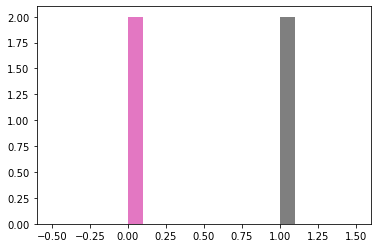

In [38]:
################## Elinor's Functions ################

def trainTestSplit(dataset): #Func to input different datasets and get out a train-test split up
    X = dataset.iloc[:,1:-1].values ## Starting from column 1 -Without id column!!!!!!!!!
    y = dataset.iloc[:,-1].values ## last column -Random Sepsis
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 5, stratify=y)
    return (X_train, X_test, y_train, y_test)

def logRegModel(X_train, X_test, y_train, y_test): #Func to input train-test split up and get out data frame of the results + confusion_matrix + histogram of y_pred
    logreg = LogisticRegression(class_weight='balanced') ## Balanced Data
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    df_models = pd.DataFrame(report).transpose()
    df_models = df_models.round(3)

    df_models = df_models.reset_index()
    df_models.rename(columns={'index':''}, inplace=True)

    df_models['Model'] = 'Logistic Regression'
    
    hist = plt.hist(y_pred)
    return (df_models, confusion_matrix(y_test, y_pred), hist)


def RFModel(X_train, X_test, y_train, y_test): #Func to input train-test split up and get out data frame of the results + confusion_matrix + histogram of y_pred
    rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced')
    #Asking Chen:
    #RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    #class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None ??????????????????????
    #-------------------------
    #param_grid_rf = {
    #    'n_estimators' : [5,10,20,30,60]  ,
    #    'max_depth' : [2,4,6,8,10,20] #Depth of the forest
    #    }
    #rf_cv = GridSearchCV(rf_model, param_grid_rf , scoring='r2', n_jobs=-1, cv=3)
    #reasults_model_rf = rf_cv.fit(X_train_rf, y_train_rf)
    #---------------------------
    results_model_rf = rf_model.fit(X_train, y_train)  
    y_pred = results_model_rf.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    df_models = pd.DataFrame(report).transpose()
    df_models = df_models.round(3)

    df_models = df_models.reset_index()
    df_models.rename(columns={'index':''}, inplace=True)

    df_models['Model'] = 'Random Forest'
    
    rf_hist = plt.hist(y_pred)
    return (df_models, confusion_matrix(y_test, y_pred), rf_hist)

def XGBoost(X_train, X_test, y_train, y_test): #Func to input train-test split up and get out data frame of the results + confusion_matrix + histogram of y_pred
    xg_boost= xgb.XGBClassifier(learning_rate=0.15,class_weight='balanced')
    results_model_xg = xg_boost.fit(X_train, y_train)
    y_pred =  results_model_xg.predict(X_test)

    
    report = classification_report(y_test, y_pred, output_dict=True)
    df_models = pd.DataFrame(report).transpose()
    df_models = df_models.round(3)

    df_models = df_models.reset_index()
    df_models.rename(columns={'index':''}, inplace=True)

    df_models['Model'] = 'XGBoost'
    
    xg_hist = plt.hist(y_pred)
    
    return (df_models, confusion_matrix(y_test, y_pred), xg_hist)
    
    
def AdaBoost(X_train, X_test, y_train, y_test): #Func to input train-test split up and get out data frame of the results + confusion_matrix + histogram of y_pred
    ada_boost = AdaBoostClassifier()
    results_model_ada_boost = ada_boost.fit(X_train, y_train)
    y_pred =  results_model_ada_boost.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    df_models = pd.DataFrame(report).transpose()
    df_models = df_models.round(3)

    df_models = df_models.reset_index()
    df_models.rename(columns={'index':''}, inplace=True)

    df_models['Model'] = 'AdaBoost'
    
    ada_boost_hist = plt.hist(y_pred)
    
    return (df_models, confusion_matrix(y_test, y_pred), ada_boost_hist)


######################## Logistic Regression ####################    
## Activating the functions train test split up inside the Logistic Regression model function WITH Sepsis feature
logReg_withSepsis = logRegModel(trainTestSplit(dataset)[0], trainTestSplit(dataset)[1], trainTestSplit(dataset)[2], trainTestSplit(dataset)[3])
print(logReg_withSepsis)

## Activating the functions train test split up inside the Logistic Regression model function WITHOUT Sepsis feature
logReg_WITHOUTSepsis = logRegModel(trainTestSplit(dataset_NO_SEPSIS)[0], trainTestSplit(dataset_NO_SEPSIS)[1], trainTestSplit(dataset_NO_SEPSIS)[2], trainTestSplit(dataset_NO_SEPSIS)[3])
print(logReg_WITHOUTSepsis)


######################## Random Forest #################### 
## Activating the functions train test split up inside the RF model function WITH Sepsis feature
RFModel_withSepsis = RFModel(trainTestSplit(dataset)[0], trainTestSplit(dataset)[1], trainTestSplit(dataset)[2], trainTestSplit(dataset)[3])
print(RFModel_withSepsis)

## Activating the functions train test split up inside the RF model function WITHOUT Sepsis feature
RFModel_WITHOUTSepsis = RFModel(trainTestSplit(dataset_NO_SEPSIS)[0], trainTestSplit(dataset_NO_SEPSIS)[1], trainTestSplit(dataset_NO_SEPSIS)[2], trainTestSplit(dataset_NO_SEPSIS)[3])
print(RFModel_WITHOUTSepsis)


######################## XGBoost #################### 
## Activating the functions train test split up inside the RF model function WITH Sepsis feature
XGBoost_withSepsis = XGBoost(trainTestSplit(dataset)[0], trainTestSplit(dataset)[1], trainTestSplit(dataset)[2], trainTestSplit(dataset)[3])
print(XGBoost_withSepsis)

## Activating the functions train test split up inside the RF model function WITHOUT Sepsis feature
XGBoost_WITHOUTSepsis = XGBoost(trainTestSplit(dataset_NO_SEPSIS)[0], trainTestSplit(dataset_NO_SEPSIS)[1], trainTestSplit(dataset_NO_SEPSIS)[2], trainTestSplit(dataset_NO_SEPSIS)[3])
print(XGBoost_WITHOUTSepsis)


######################## AdaBoost #################### 
## Activating the functions train test split up inside the RF model function WITH Sepsis feature
AdaBoost_withSepsis = AdaBoost(trainTestSplit(dataset)[0], trainTestSplit(dataset)[1], trainTestSplit(dataset)[2], trainTestSplit(dataset)[3])
print(AdaBoost_withSepsis)

## Activating the functions train test split up inside the RF model function WITHOUT Sepsis feature
AdaBoost_WITHOUTSepsis = AdaBoost(trainTestSplit(dataset_NO_SEPSIS)[0], trainTestSplit(dataset_NO_SEPSIS)[1], trainTestSplit(dataset_NO_SEPSIS)[2], trainTestSplit(dataset_NO_SEPSIS)[3])
print(AdaBoost_WITHOUTSepsis)

In [39]:
models_results_with_Sepsis = pd.concat([logReg_withSepsis[0], RFModel_withSepsis[0],
                                        XGBoost_withSepsis[0],AdaBoost_withSepsis[0]])

models_results_with_Sepsis.set_index(['Model',''], inplace=True)
print("A comparison between models WITH Sepsis como: ")
models_results_with_Sepsis

A comparison between models WITH Sepsis como: 


precision  recall  f1-score  support
Model                                                                 
Logistic Regression 0                  0.50     1.0     0.667      1.0
                    1                  0.00     0.0     0.000      1.0
                    accuracy           0.50     0.5     0.500      0.5
                    macro avg          0.25     0.5     0.333      2.0
                    weighted avg       0.25     0.5     0.333      2.0
Random Forest       0                  0.50     1.0     0.667      1.0
                    1                  0.00     0.0     0.000      1.0
                    accuracy           0.50     0.5     0.500      0.5
                    macro avg          0.25     0.5     0.333      2.0
                    weighted avg       0.25     0.5     0.333      2.0
XGBoost             0                  0.50     1.0     0.667      1.0
                    1                  0.00     0.0     0.000      1.0
                    accuracy           0.50     0.5     0.500      0.5
                    macro avg          0.25     0.5     0.333      2.0
                    weighted avg       0.25     0.5     0.333      2.0
AdaBoost            0                  0.50     1.0     0.667      1.0
                    1                  0.00     0.0     0.000      1.0
                    accuracy           0.50     0.5     0.500      0.5
                    macro avg          0.25     0.5     0.333      2.0
                    weighted avg       0.25     0.5     0.333      2.0

In [98]:
models_results_WITHOUT_Sepsis = pd.concat([logReg_WITHOUTSepsis[0],RFModel_WITHOUTSepsis[0],
                                           XGBoost_WITHOUTSepsis[0],AdaBoost_WITHOUTSepsis[0]])

models_results_WITHOUT_Sepsis.set_index(['Model',''], inplace=True)
print("A comparison between models WITHOUT Sepsis como: ")
models_results_WITHOUT_Sepsis

A comparison between models WITHOUT Sepsis como: 


precision  recall  f1-score  support
Model                                                                 
Logistic Regression 0                  0.50     1.0     0.667      1.0
                    1                  0.00     0.0     0.000      1.0
                    accuracy           0.50     0.5     0.500      0.5
                    macro avg          0.25     0.5     0.333      2.0
                    weighted avg       0.25     0.5     0.333      2.0
Random Forest       0                  0.50     1.0     0.667      1.0
                    1                  0.00     0.0     0.000      1.0
                    accuracy           0.50     0.5     0.500      0.5
                    macro avg          0.25     0.5     0.333      2.0
                    weighted avg       0.25     0.5     0.333      2.0
XGBoost             0                  0.50     1.0     0.667      1.0
                    1                  0.00     0.0     0.000      1.0
                    accuracy           0.50     0.5     0.500      0.5
                    macro avg          0.25     0.5     0.333      2.0
                    weighted avg       0.25     0.5     0.333      2.0
AdaBoost            0                  0.50     1.0     0.667      1.0
                    1                  0.00     0.0     0.000      1.0
                    accuracy           0.50     0.5     0.500      0.5
                    macro avg          0.25     0.5     0.333      2.0
                    weighted avg       0.25     0.5     0.333      2.0

The result of Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


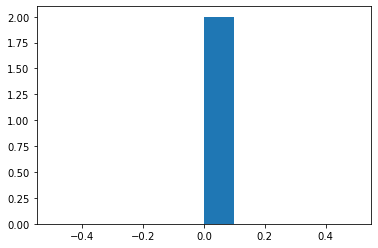

In [40]:
#############Logistic regression################# - -WITH SEPSIS

#from sklearn.metrics import classification_report
X = dataset.iloc[:,1:-1].values ## Starting from column 1 -Without id column!!!!!!!!!
y = dataset.iloc[:,-1].values ## last column -Random Sepsis


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 42, stratify=y)

#sc_x = StandardScaler()
#X_train = sc_x.fit_transform(X_train)
#X_test = sc_x.transform(X_test)  

logreg = LogisticRegression(class_weight='balanced') ## Balanced Data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print("The result of Logistic Regression:",end ='\n')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
lg_hist = plt.hist(y_pred)

C:\Users\EKomarov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EKomarov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EKomarov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The result of Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


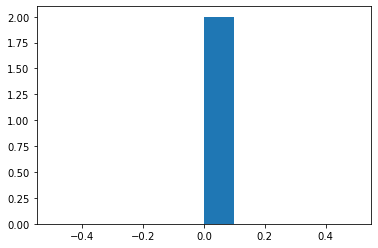

In [39]:
#############Logistic regression################# - -WITHOUT SEPSIS

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#from sklearn.metrics import classification_report
X_NO_SEPSIS = dataset_NO_SEPSIS.iloc[:,1:-1].values ## Starting from column 1 -Without id column!!!!!!!!!
y_NO_SEPSIS = dataset_NO_SEPSIS.iloc[:,-1].values ## last column -Random Sepsis


X_train_NO_SEPSIS, X_test_NO_SEPSIS, y_train_NO_SEPSIS, y_test_NO_SEPSIS = train_test_split(X_NO_SEPSIS, y_NO_SEPSIS , test_size = 0.25, random_state = 42, stratify=y_NO_SEPSIS)

#sc_x = StandardScaler()
#X_train = sc_x.fit_transform(X_train)
#X_test = sc_x.transform(X_test)  

logreg_NO_SEPSIS = LogisticRegression(class_weight='balanced') ## Balanced Data
logreg_NO_SEPSIS.fit(X_train_NO_SEPSIS, y_train_NO_SEPSIS)
y_pred_NO_SEPSIS = logreg_NO_SEPSIS.predict(X_test_NO_SEPSIS)


print("The result of Logistic Regression:",end ='\n')

print(classification_report(y_test_NO_SEPSIS, y_pred_NO_SEPSIS))
print(confusion_matrix(y_test_NO_SEPSIS, y_pred_NO_SEPSIS))
lg_hist_NO_SEPSIS = plt.hist(y_pred_NO_SEPSIS)

In [40]:
# .iloc[:-1, :] to exclude support
#sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred)).iloc[:-1, :].T, annot=True)

The result of Random Forest:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orlil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


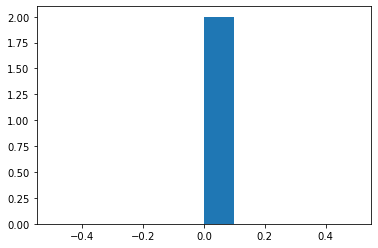

In [41]:
rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced')
    
    #Asking Chen:
    #RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    #class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None ??????????????????????
    #-------------------------
    #param_grid_rf = {
    #    'n_estimators' : [5,10,20,30,60]  ,
    #    'max_depth' : [2,4,6,8,10,20] #Depth of the forest
    #    }
    #rf_cv = GridSearchCV(rf_model, param_grid_rf , scoring='r2', n_jobs=-1, cv=3)
    #reasults_model_rf = rf_cv.fit(X_train_rf, y_train_rf)
    #---------------------------
results_model_rf = rf_model.fit(X_train, y_train)  
y_pred_rf =  results_model_rf.predict(X_test)

        
print("The result of Random Forest:",end ='\n')

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
rf_hist = plt.hist(y_pred_rf)

The result of Random Forest Without Sepsis column from Como output:


C:\Users\EKomarov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EKomarov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


C:\Users\EKomarov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


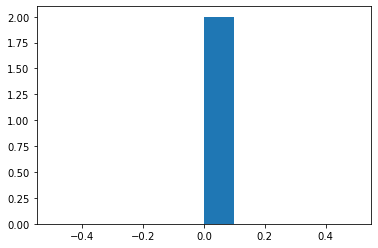

In [42]:
rf_model_NO_SEPSIS = RandomForestClassifier(n_estimators=100,class_weight='balanced')
    
    #Asking Chen:
    #RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    #class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None ??????????????????????
    #-------------------------
    #param_grid_rf = {
    #    'n_estimators' : [5,10,20,30,60]  ,
    #    'max_depth' : [2,4,6,8,10,20] #Depth of the forest
    #    }
    #rf_cv = GridSearchCV(rf_model, param_grid_rf , scoring='r2', n_jobs=-1, cv=3)
    #reasults_model_rf = rf_cv.fit(X_train_rf, y_train_rf)
    #---------------------------
results_model_rf_NO_SEPSIS = rf_model_NO_SEPSIS.fit(X_train_NO_SEPSIS, y_train_NO_SEPSIS)  
y_pred_rf_NO_SEPSIS =  results_model_rf_NO_SEPSIS.predict(X_test_NO_SEPSIS)

    
print("The result of Random Forest Without Sepsis column from Como output:",end ='\n')

print(classification_report(y_test_NO_SEPSIS, y_pred_rf_NO_SEPSIS))
print(confusion_matrix(y_test_NO_SEPSIS, y_pred_rf_NO_SEPSIS))
rf_hist_NO_SEPSIS = plt.hist(y_pred_NO_SEPSIS)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier,\
AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [44]:
#ensamble - file of Chen
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''Takes in true and predicted values.
    The function prints out a classifcation report
    and a confusion matrix using seaborn's heatmap.
    The function will also print the recall, accuracy,
    precision, and f1 scores.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    print('\n')
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)

[13:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train Accuracy: 0.6666666666666666
Test Accuracy: 0.5


Recall:  0.0
Accuracy:  0.5
Precision:  0.0
F1:  0.0




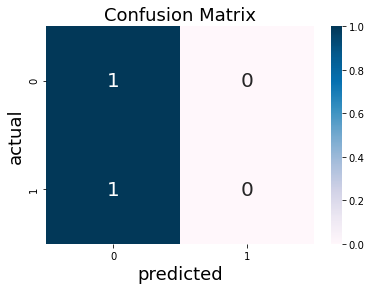

In [45]:
xg_boost= xgb.XGBClassifier(learning_rate=0.15,class_weight='balanced')
xg_boost.fit(X_train, y_train)

train_acc = accuracy_score(y_train, xg_boost.predict(X_train))
test_acc = accuracy_score(y_test, xg_boost.predict(X_test))

print('Train Accuracy: {}'.format(train_acc))
print('Test Accuracy: {}'.format(test_acc))
print('\n')
evaluation(y_test, xg_boost.predict(X_test))

[13:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


The result of XGboost:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


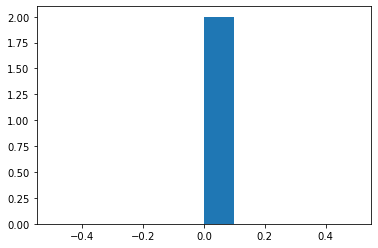

In [46]:
xg_boost= xgb.XGBClassifier(learning_rate=0.15,class_weight='balanced')
results_model_xg = xg_boost.fit(X_train, y_train)
y_pred_xg =  results_model_xg.predict(X_test)

        
print("The result of XGboost:",end ='\n')

print(classification_report(y_test, y_pred_xg))
print(confusion_matrix(y_test, y_pred_xg))
xg_hist = plt.hist(y_pred_xg)

[13:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


The result of XGboost Without Sepsis column from Como output:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


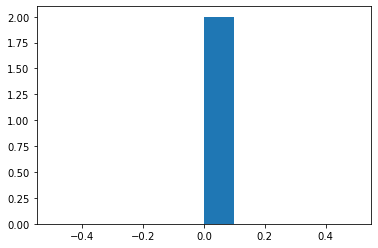

In [47]:
xg_boost_NO_SEPSIS= xgb.XGBClassifier(learning_rate=0.15,class_weight='balanced')
results_model_xg_NO_SEPSIS = xg_boost_NO_SEPSIS.fit(X_train_NO_SEPSIS, y_train_NO_SEPSIS)
y_pred_xg_NO_SEPSIS =  results_model_xg_NO_SEPSIS.predict(X_test_NO_SEPSIS)

        
print("The result of XGboost Without Sepsis column from Como output:",end ='\n')

print(classification_report(y_test_NO_SEPSIS, y_pred_xg_NO_SEPSIS))
print(confusion_matrix(y_test_NO_SEPSIS, y_pred_xg_NO_SEPSIS))
xg_hist_NO_SEPSIS = plt.hist(y_pred_xg_NO_SEPSIS)

The result of Ada Boost:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


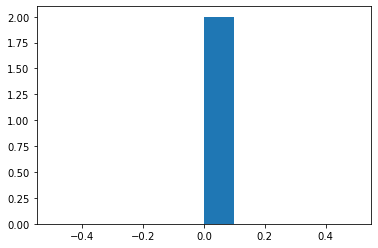

In [48]:
ada_boost = AdaBoostClassifier()
results_model_ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada_boost =  results_model_ada_boost.predict(X_test)

        
print("The result of Ada Boost:",end ='\n')

print(classification_report(y_test, y_pred_ada_boost))
print(confusion_matrix(y_test, y_pred_ada_boost))
ada_boost_hist = plt.hist(y_pred_ada_boost)

The result of Ada Boost Without Sepsis column from Como output:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


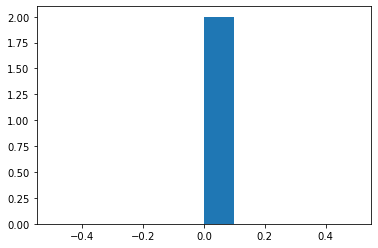

In [49]:
ada_boost_NO_SEPSIS = AdaBoostClassifier()
results_model_ada_boost_NO_SEPSIS = ada_boost_NO_SEPSIS.fit(X_train_NO_SEPSIS, y_train_NO_SEPSIS)
y_pred_ada_boost_NO_SEPSIS =  results_model_ada_boost_NO_SEPSIS.predict(X_test_NO_SEPSIS)

        
print("The result of Ada Boost Without Sepsis column from Como output:",end ='\n')

print(classification_report(y_test_NO_SEPSIS, y_pred_ada_boost_NO_SEPSIS))
print(confusion_matrix(y_test_NO_SEPSIS, y_pred_ada_boost_NO_SEPSIS))
ada_boost_hist_NO_SEPSIS = plt.hist(y_pred_ada_boost_NO_SEPSIS)